# Real State Analisys

Analysis of Real State Market

### Import Dependencies

In [1]:
# import warnings
# warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time
import pprint
import datetime
import json

# Import DB user and password
from api_keys import positionstack_key
from api_keys import opencagedata_API
from api_keys import DATABASE_URL

In [3]:
# !pip install termcolor
from termcolor import colored

In [4]:
 # Imports the method used to connect to DBs
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import update

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime

# from config import db_user, dialect

In [5]:
# Create database connection
engine = create_engine(DATABASE_URL) 

<hr style="border: 3px solid red;">

### Basic Analysis

In [6]:
# Query database using pandas
SQL_Query_df = pd.read_sql_query('''select * from realstatelisting''', engine)

In [7]:
SQL_Query_df.describe()

,house_id,price,bed,bath,sqft,lot,latitude,longitude
count,1659.000000,1659.000000,1659.000000,1659.000000,1651.000000,1440.000000,1659.000000,1659.000000
mean,843.271248,245708.637131,3.350211,2.270344,1949.852816,7286.980556,29.806842,-95.413895
std,495.160943,54912.730401,0.679498,0.505698,589.256141,6393.935968,0.135985,0.156589
min,1.000000,150000.000000,1.000000,0.500000,480.000000,1399.000000,29.544055,-95.718095
25%,418.500000,199000.000000,3.000000,2.000000,1527.500000,5000.000000,29.700344,-95.530787
50%,833.000000,239900.000000,3.000000,2.500000,1844.000000,6825.000000,29.809264,-95.417824
75%,1259.500000,294927.500000,4.000000,2.500000,2300.000000,8400.000000,29.904332,-95.279514
max,1719.000000,350000.000000,6.000000,4.000000,6700.000000,113256.000000,30.209713,-95.096904


In [8]:
SQL_Query_df.head(2)

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,house_link,image_1,image_2,map_link,google_map,created_date
0,173,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://www.openstreetmap.org/?mlat=29.8113709...,https://www.google.com/maps/place/308+Avenue+o...,2021-01-10 21:13:15.025962
1,174,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://www.openstreetmap.org/?mlat=29.8806332...,https://www.google.com/maps/place/7911+Napawoo...,2021-01-10 21:13:15.139330


Text(0, 0.5, 'price')

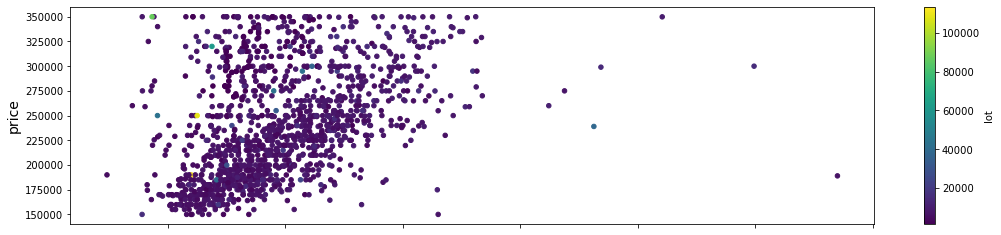

In [9]:
ax1 = SQL_Query_df.plot.scatter(x='sqft',y='price',c='lot', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("sqft", fontsize=14)
ax1.set_ylabel("price", fontsize=14)

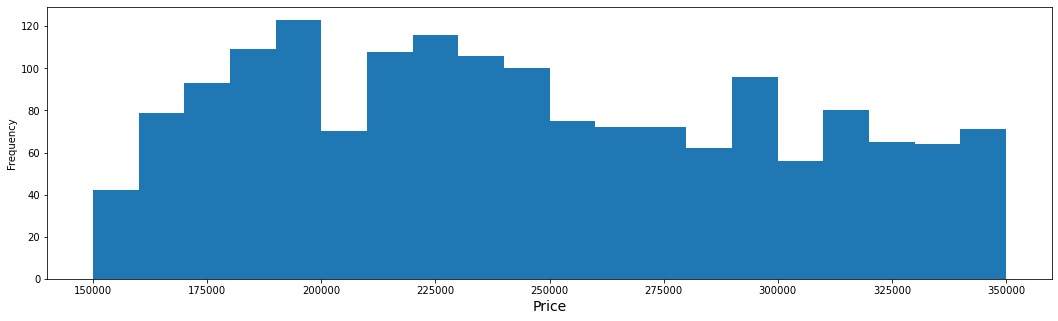

In [10]:
ax1 = SQL_Query_df['price'].plot(kind='hist',bins=20,figsize=(18,5));
ax1.set_xlabel("Price", fontsize=14);

Text(0, 0.5, 'longitude')

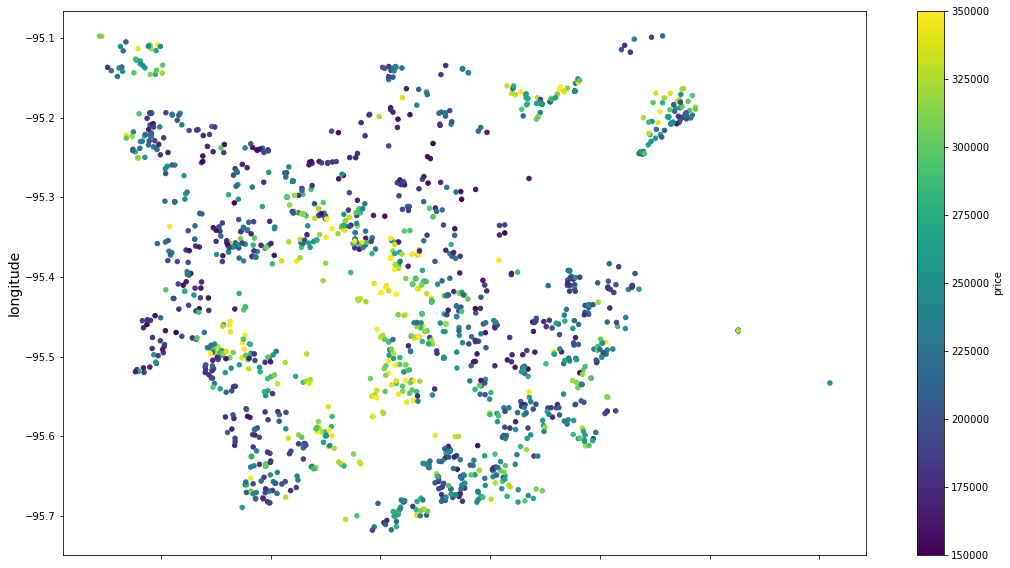

In [11]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

In [12]:
zipcode_list = []
for jj in range(len(SQL_Query_df)):
    zipcode_list.append(int(SQL_Query_df.iloc[jj].address.split(" ")[-1]))

In [13]:
SQL_Query_df['Zip Code'] = pd.Series(zipcode_list)

In [14]:
print(f"Number of Zip Codes: {len(SQL_Query_df['Zip Code'].unique())}")

Number of Zip Codes: 97


In [15]:
SQL_Query_df.drop(columns={'house_link','image_1','image_2','map_link','google_map'})

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,created_date,Zip Code
0,173,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,2021-01-10 21:13:15.025962,77009
1,174,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,2021-01-10 21:13:15.139330,77088
2,175,"3110 Willow Wood Trl, Houston, TX 77345",295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,2021-01-10 21:13:15.252517,77345
3,176,"16118 Windom Dr, Houston, TX 77598",179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,2021-01-10 21:13:15.365052,77598
4,177,"3405 Rawley St, Houston, TX 77020",309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,2021-01-10 21:13:15.478296,77020
...,...,...,...,...,...,...,...,...,...,...,...
1654,437,"13106 Grassy Briar Ln, Houston, TX 77085",299900.0,4.0,2.5,2159.0,5072.0,29.633008,-95.476450,2021-01-20 05:47:45.227510,77085
1655,438,"1504 Claremont Garden Cir, Houston, TX 77047",235999.0,3.0,2.5,1568.0,3537.0,29.624122,-95.396798,2021-01-20 05:47:45.365360,77047
1656,439,"14211 Valverde, Houston, TX 77083",297043.0,3.0,2.5,1905.0,NaN,29.720205,-95.279514,2021-01-20 05:47:45.501871,77083
1657,440,"10711 Zachary Cove St, Houston, TX 77016",244995.0,4.0,2.5,2087.0,NaN,29.720205,-95.279514,2021-01-20 05:47:45.638105,77016


Text(0, 0.5, 'Price ($)')

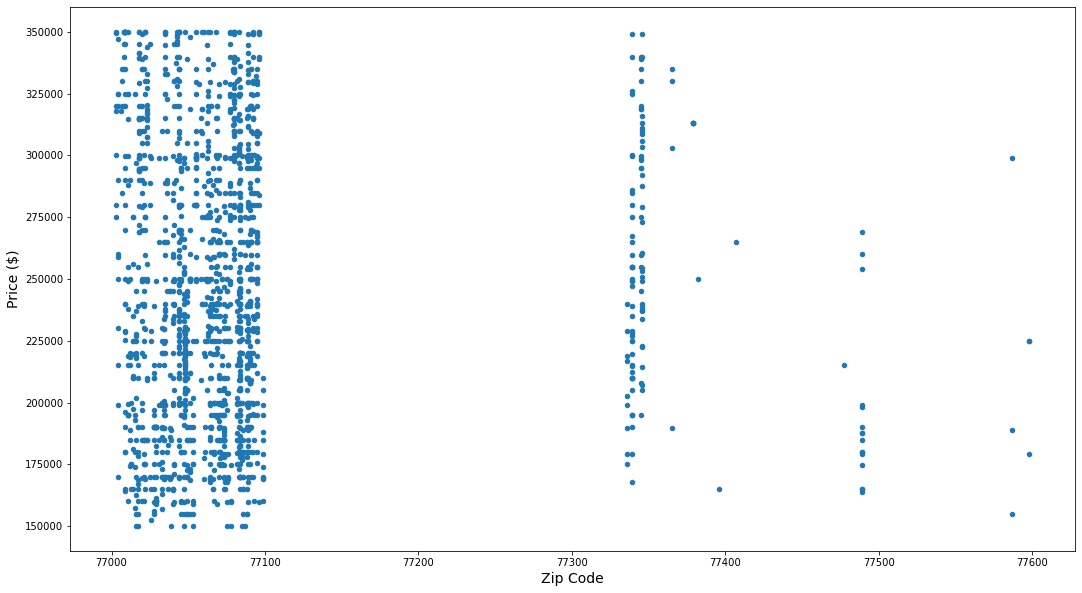

In [16]:
ax1 = SQL_Query_df.plot.scatter(x='Zip Code',y='price',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'longitude')

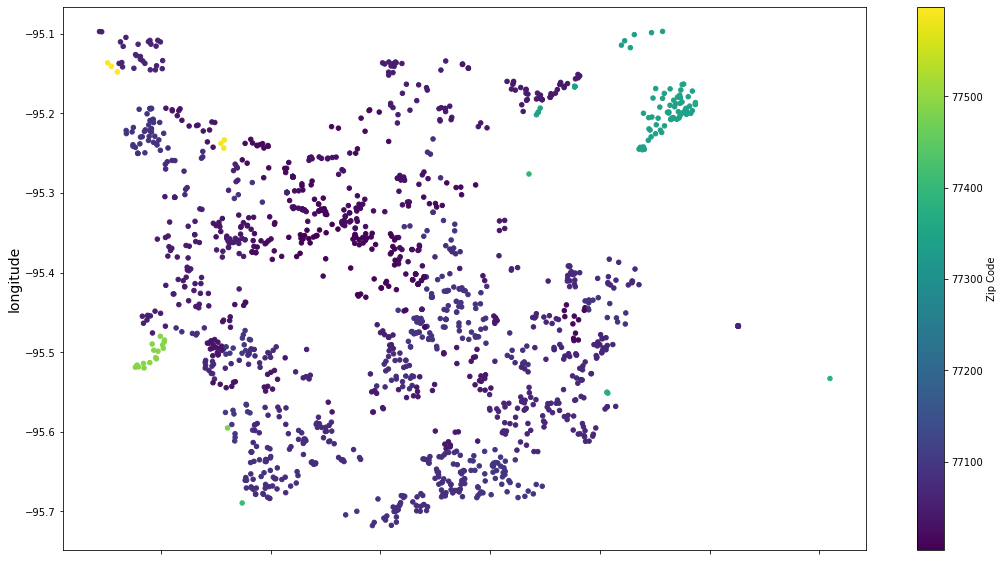

In [17]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='Zip Code', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

Text(0, 0.5, 'Price ($)')

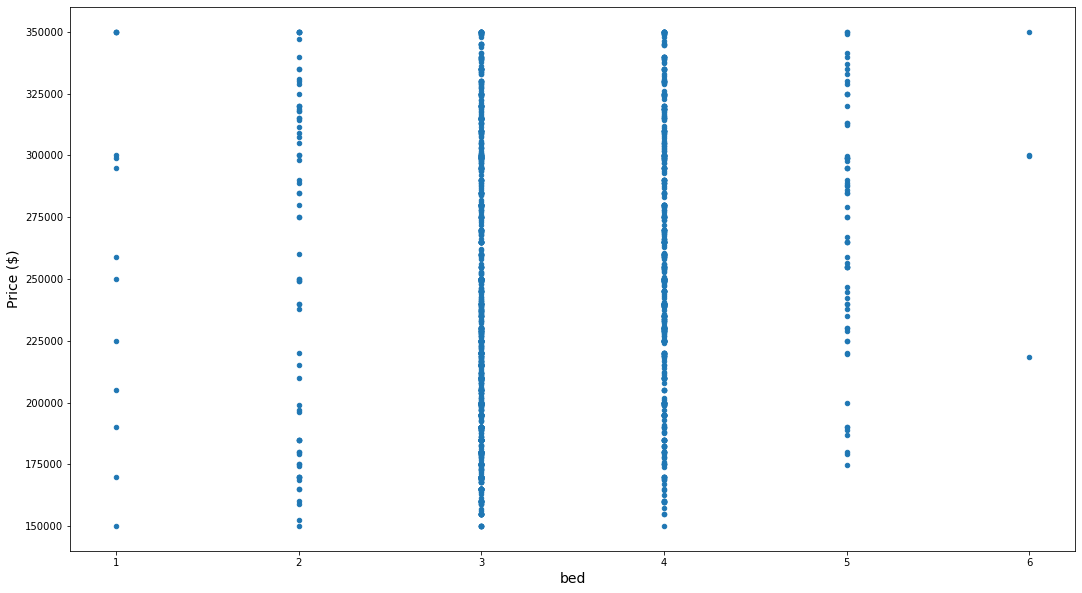

In [18]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='price',figsize=(18,10))
ax1.set_xlabel("bed", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'sqft')

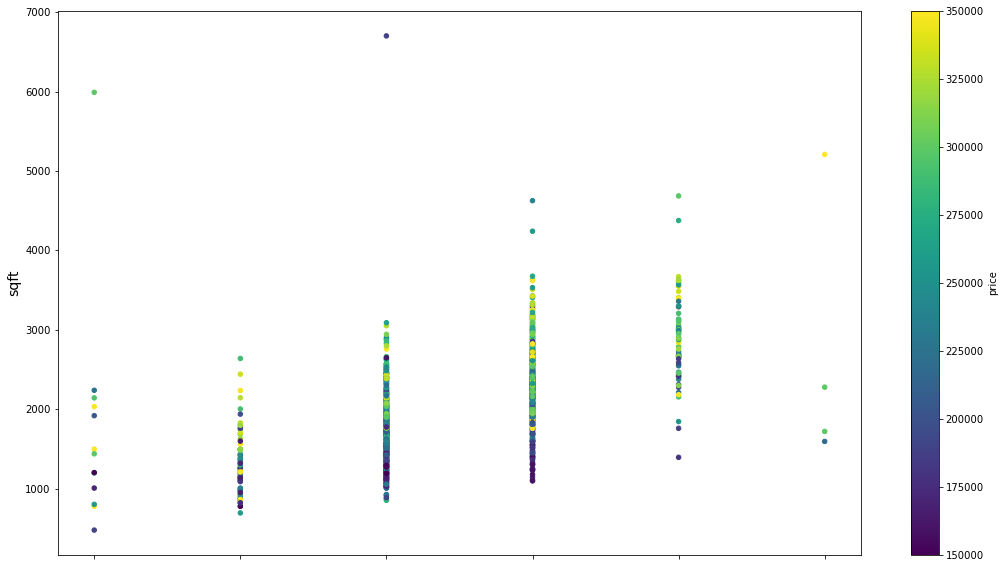

In [19]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='sqft',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("sqft", fontsize=14)

<hr style="border: 3px solid red;">

### Zip Codes Poligons

Import GeoJson zip code poligons from https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json and use the table from https://www.zip-codes.com/city/tx-houston.asp
to filter Houston Zip Codes.

In [20]:
zip_codes = pd.read_csv(os.path.join("Resources","ZipCodes.csv"))

In [21]:
zip_codes

,Zip Code,Type,County,Population,Area Code(s)
0,77001,P.O. Box,Harris,0,832 / 713 / 281 / 346
1,77002,Standard,Harris,"16,793",832 / 713 / 281 / 346
2,77003,Standard,Harris,"10,508",832 / 713 / 281 / 346
3,77004,Standard,Harris,"32,692",832 / 713 / 281 / 346
4,77005,Standard,Harris,"25,528",713 / 832 / 346
...,...,...,...,...,...
173,77291,P.O. Box,Harris,0,832 / 713 / 281 / 346
174,77292,P.O. Box,Harris,0,832 / 713 / 281 / 346
175,77293,P.O. Box,Harris,0,832 / 713 / 281 / 346
176,77297,Unique,Harris,0,832 / 713 / 281 / 346


#### Correlate and Export GeoJson Poligons

In [22]:
# Skip running this if not necessary
run_this = False 

if run_this:
    
    # Create a list with the zip codes
    zip_code_list = list(zip_codes['Zip Code'].values)

    # GeoJson poligon data from Texas
    url_zip_codes = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json"

    # Request the data
    zips_codes_json = requests.get(url_zip_codes).json()

    # Verify if the zip code in the GeoJson is in the list of zip codes
    Houston_zip_codes_Geojson = []
    for jj in range(len(zips_codes_json['features'])):
        if int(zips_codes_json['features'][jj]['properties']['ZCTA5CE10']) in zip_code_list:
            Houston_zip_codes_Geojson.append(zips_codes_json['features'][jj])

    # Save a new GeoJson file
    with open(os.path.join("Resources","HOUSTON_ZIPCODES_GEOJSON.json"), "w") as outfile: 
        json.dump({'type': 'FeatureCollection', 'features': Houston_zip_codes_Geojson }, outfile)

<hr style="border: 3px solid red;">

## Machine Learning (Attempting to predict house prices)

Use ML to investigate the house dataset to get some insigths about the real estate market based on the data collected.

In [23]:
# Create a dataframe with the houses data on the database and drop the columns with urls and address
houses_df = SQL_Query_df.drop(columns={'address','house_link','image_1','image_2','map_link','google_map','created_date'})
print(f"Shape of the data is: {houses_df.shape}")
houses_df.head()

Shape of the data is: (1659, 9)


,house_id,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
0,173,319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,77009
1,174,199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,77088
2,175,295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,77345
3,176,179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,77598
4,177,309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,77020


#### Check how many `null/Nan` values are in each column

In [24]:
houses_df.isnull().sum()

house_id       0
price          0
bed            0
bath           0
sqft           8
lot          219
latitude       0
longitude      0
Zip Code       0
dtype: int64

#### Create a ML model to fill the nulls for the lot size

Shape:  (1433, 1) (1433, 1)


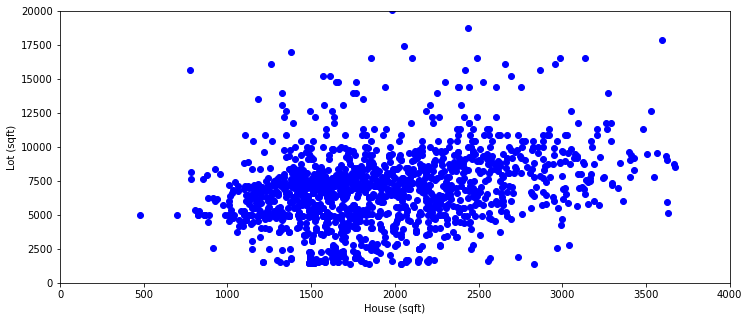

In [25]:
# Create a temporario dataframe without the NANs
houses_no_NAN = houses_df.dropna();

# Assign data values to X and y for model training
X = houses_no_NAN["sqft"].values.reshape(-1,1)
y = houses_no_NAN["lot"].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

# Plot the data to see if a linear trend exists
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(X, y, c='blue')
plt.xlabel("House (sqft)")
plt.ylabel("Lot (sqft)")
plt.xlim([0,4000]);
plt.ylim([0,20000]);

#### Linear Regression

In [26]:
### Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Fit the model to the training data. 
model.fit(X_train, y_train)

## Based on the data that we've trained on, a line has been fit to our data. 
# We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes.
# print('Weight coefficients: ', model.coef_)
# print('y-axis intercept: ', model.intercept_)
print(f"Linear model: y = {model.intercept_[0]} + {model.coef_[0][0]}x")

### Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### Call the `score` method on the model to show the r2 score
model_score = model.score(X_test, y_test)
print(colored(f"Model score (r2 score): {model_score}","red"))

# predictions will be a list of all of our predicted y-values
predictions = model.predict(X)

#### Create a DataFrame with each predicted y-value, actual y-value, and error.
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})

Linear model: y = 4654.28876024688 + 1.3678791776827324x
Mean Squared Error (MSE): 46126842.53349011
R-squared (R2): -0.005239369474189681
Model score (r2 score): -0.005239369474189681


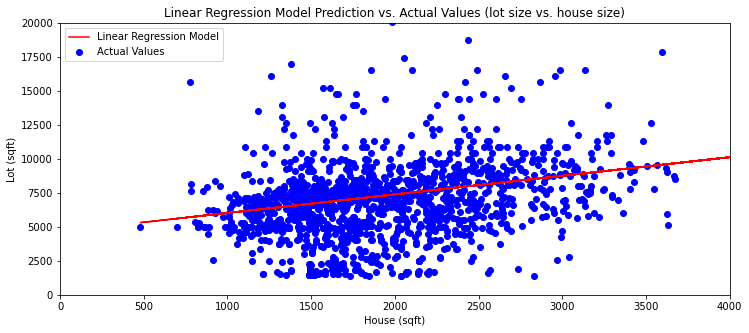

In [27]:
### Plot the actual values (blue) and the prediction line (red)
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red')
plt.title('Linear Regression Model Prediction vs. Actual Values (lot size vs. house size)')
plt.xlabel("House (sqft)")
plt.ylabel("Lot (sqft)")
plt.xlim([0,4000]);
plt.ylim([0,20000]);
plt.legend(["Linear Regression Model","Actual Values"]);

#### Multiple Linear Regression

Shape:  (1433, 3) (1433, 1)
R2 Score: 0.06173553137969501


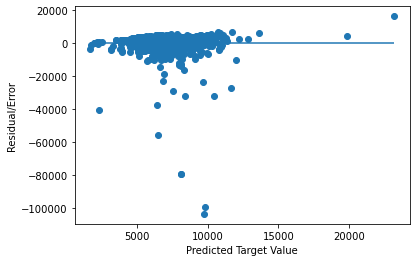

In [28]:
# Assign data values to X and y for model training
X = houses_no_NAN[["sqft","bed","bath"]]
y = houses_no_NAN["lot"].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.xlabel("Predicted Target Value")
plt.ylabel("Residual/Error")
plt.show()

#### Cleaning and Preprocessing Data for Machine Learning

So far we have tried the linear regression model without scaling the data. Now, let see if there is any improvement if we scale the data.

In [29]:
## Scaling and Normalization

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,sqft,bed,bath
203,2959.0,4.0,3.5
1387,1797.0,3.0,2.0
754,1762.0,3.0,2.0
1247,3128.0,5.0,3.5
249,1773.0,3.0,2.0


In [30]:
### Fit the training data to the StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

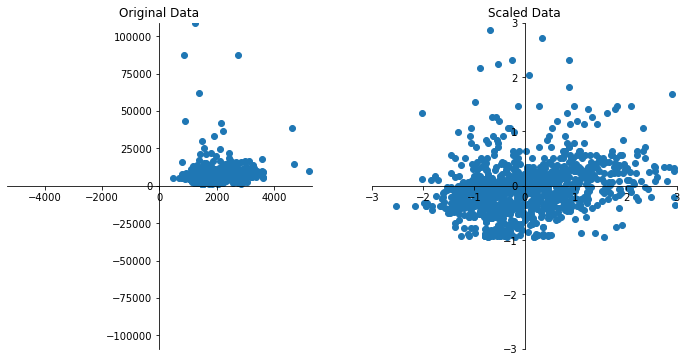

In [31]:
### Plot the scaled data
# Create your subplots
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Add title labels
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Using your max x & y values, set the plot axis limits for your 
maxx = X_train["sqft"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx - 100, maxx + 100)
axes1.set_ylim(-maxy - 100, maxy + 100)

# Set limits for your scaled data
axes2.set_xlim(-3, 3)
axes2.set_ylim(-3, 3)

# Use a function to apply plot formatting, to avoid having to write it out twice
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# apply formatting function to each axis
set_axes(axes1)
set_axes(axes2)

# plot the original data and the scaled data
axes1.scatter(X_train["sqft"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [32]:
# Fit the Model to the scaled training data and make predictions using the scaled test data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

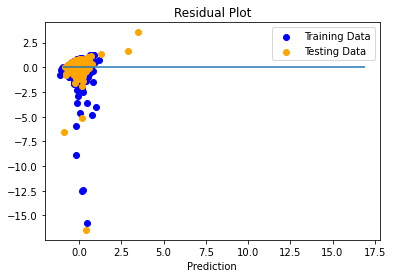

In [33]:
# Step 5) Plot the residuals
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [34]:
### Step 6) Quantify your model using the scaled data
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1784631611205492, R2: -0.010210645008191799


#### Multiple Linear Regression for House Price

In [35]:
cleaned_df = houses_df.dropna()

In [36]:
cleaned_df

,house_id,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
0,173,319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,77009
1,174,199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,77088
2,175,295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,77345
3,176,179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,77598
4,177,309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,77020
...,...,...,...,...,...,...,...,...,...
1651,560,170000.0,2.0,2.0,1322.0,4110.0,29.867406,-95.626265,77084
1652,435,220000.0,3.0,2.0,1518.0,4847.0,29.814642,-95.707259,77084
1653,436,350000.0,4.0,3.5,2823.0,10019.0,29.681966,-95.653128,77083
1654,437,299900.0,4.0,2.5,2159.0,5072.0,29.633008,-95.476450,77085


In [37]:
# cleaned_df.head().to_html()

In [38]:
X = cleaned_df[['bed', 'bath', 'sqft', 'lot','Zip Code']].values.reshape(-1,5)
y = cleaned_df['price'].values.reshape(-1,1)

In [39]:
## Scaling and Normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
### Fit the training data to the StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [41]:
# Fit the Model to the scaled training data and make predictions using the scaled test data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

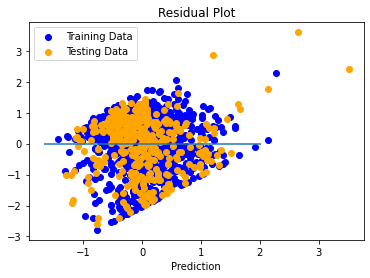

In [42]:
# Step 5) Plot the residuals
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [43]:
### Step 6) Quantify your model using the scaled data
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8598395042439883, R2: 0.20047477395685998


In [44]:
# Regularization
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8598366699689987, R2: 0.20047740941887426


In [45]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8535549618027735, R2: 0.20631848105695183


In [46]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01, l1_ratio=0.001).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8569901690782861, R2: 0.2031242397364461


<hr style="border: 3px solid red;">

## Machine Learning (Attempting to predict user preferences)

In [47]:
# Query database using pandas to get the inner join for user selection and houses
query_stm = f"""SELECT * FROM userselection 
                INNER JOIN realstatelisting ON userselection.house_id=realstatelisting.house_id;"""
User_Selection_df = pd.read_sql_query(query_stm, engine)

In [48]:
# Verify all user selection possibilities
User_Selection_df['user_choice'].unique()

array(['Love', 'Like', 'Dislike', 'Yes', 'No', 'Maybe'], dtype=object)

In [49]:
# Replace old values of possible user selection
User_Selection_df.replace('Yes', 'Love',inplace=True)
User_Selection_df.replace('Maybe', 'Like',inplace=True)
User_Selection_df.replace('No', 'Dislike',inplace=True)

In [50]:
# Replace old values of possible user selection
User_Selection_df.replace('Love',2,inplace=True)
User_Selection_df.replace('Like',1,inplace=True)
User_Selection_df.replace('Dislike',0,inplace=True)

In [51]:
# Verify all user selection possibilities
User_Selection_df['user_choice'].unique()

array([2, 1, 0])

In [52]:
# Double check if there were no more 'Yes' as user choice
User_Selection_df['user_choice'].loc[User_Selection_df['user_choice']=='Yes']

Series([], Name: user_choice, dtype: int64)

In [53]:
# Add zip code column
zipcode_list = []
for jj in range(len(User_Selection_df)):
    zipcode_list.append(int(User_Selection_df.iloc[jj].address.split(" ")[-1]))
User_Selection_df['Zip Code'] = pd.Series(zipcode_list)

In [54]:
# Show one row of the user selection dataframe
User_Selection_df.iloc[1]

userselection_id                                                   93
username                                                      Gabriel
useremail                                                        None
house_id                                                          174
user_choice                                                         2
created_date                               2021-01-11 03:47:32.542676
house_id                                                          174
address                           7911 Napawood Ct, Houston, TX 77088
price                                                   199900.000000
bed                                                          4.000000
bath                                                         2.500000
sqft                                                      1920.000000
lot                                                       6491.000000
latitude                                                    29.880633
longitude           

In [55]:
# Create a new dataframe with only relevante columns for the user choice investigation
user_df = User_Selection_df[['house_id','username','user_choice','price', 'bed','bath','sqft','lot', 'latitude', 'longitude','Zip Code']]

In [56]:
user_angela_df = user_df[User_Selection_df['username']=='Angela']

#### Look what are the similarities of the houses marked as liked

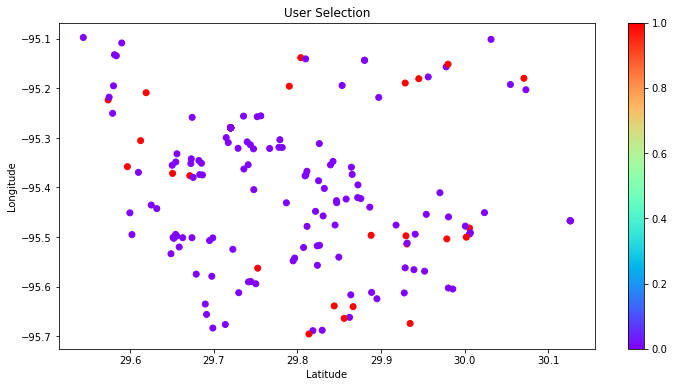

In [57]:
# Geolocation of houses
x = user_angela_df['latitude']
y = user_angela_df['longitude']

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c=user_angela_df['user_choice'], cmap='rainbow')
plt.colorbar()
# plt.legend()
plt.title("User Selection")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [58]:
user_angela_df.loc[user_angela_df['user_choice']==1]

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
1520,1079,1079,Angela,1,230000.0,5.0,2.5,2684.0,7104.0,29.866567,-95.640681,77084
1521,363,363,Angela,1,219999.0,3.0,2.5,1529.0,5522.0,29.671351,-95.376160,77051
1526,1412,1412,Angela,1,205000.0,3.0,2.0,1712.0,5265.0,29.804002,-95.137833,77049
1539,1260,1260,Angela,1,165000.0,3.0,2.0,1399.0,7920.0,29.888087,-95.496605,77040
1540,492,492,Angela,1,279000.0,5.0,3.5,3624.0,9047.0,29.813781,-95.695870,77084
1547,1159,1159,Angela,1,319000.0,4.0,2.5,3142.0,7536.0,29.573749,-95.223222,77089
1554,1202,1202,Angela,1,250000.0,4.0,2.0,2210.0,7176.0,29.945069,-95.180402,77044
1555,1288,1288,Angela,1,260000.0,3.0,2.0,2000.0,7694.0,29.650800,-95.371561,77051
1563,1599,1599,Angela,1,350000.0,4.0,3.5,3620.0,9348.0,30.005674,-95.481918,77068
1565,1614,1614,Angela,1,203990.0,3.0,2.5,1443.0,NaN,29.612586,-95.305455,77048


In [59]:
# Basic stats on the houses marked as liked
user_angela_df.loc[user_angela_df['user_choice']==1].describe()

,house_id,house_id,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
count,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,24.000000,28.000000,28.000000,28.000000
mean,791.571429,791.571429,1.0,256240.250000,3.750000,2.535714,2418.714286,7888.083333,29.833308,-95.394806,77079.107143
std,539.561443,539.561443,0.0,51699.383939,0.700529,0.525790,680.457681,2025.169685,0.152003,0.180039,78.375799
min,6.000000,6.000000,1.0,165000.000000,3.000000,2.000000,1399.000000,3619.000000,29.573749,-95.695870,77014.000000
25%,288.750000,288.750000,1.0,219374.250000,3.000000,2.000000,1815.500000,6863.000000,29.720205,-95.506450,77044.000000
50%,738.500000,738.500000,1.0,249500.000000,4.000000,2.500000,2296.000000,7368.000000,29.849929,-95.373860,77057.000000
75%,1267.000000,1267.000000,1.0,284249.750000,4.000000,2.500000,2850.750000,9214.500000,29.937325,-95.219572,77084.000000
max,1614.000000,1614.000000,1.0,350000.000000,5.000000,3.500000,3624.000000,12197.000000,30.126184,-95.137833,77346.000000


In [60]:
user_angela_df.dropna(inplace=True)

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
user_angela_df

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
1517,148,148,Angela,0,270000.0,4.0,2.5,3406.0,9000.0,30.005637,-95.494188,77068
1518,222,222,Angela,0,185000.0,4.0,2.0,1546.0,7708.0,29.602215,-95.495212,77489
1519,702,702,Angela,0,295000.0,4.0,3.5,3630.0,5100.0,29.862264,-95.662290,77084
1520,1079,1079,Angela,1,230000.0,5.0,2.5,2684.0,7104.0,29.866567,-95.640681,77084
1521,363,363,Angela,1,219999.0,3.0,2.5,1529.0,5522.0,29.671351,-95.376160,77051
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1525,1525,Angela,0,189500.0,3.0,2.5,1782.0,6867.0,29.656032,-95.332044,77033
1677,273,273,Angela,1,330000.0,4.0,3.5,3188.0,8712.0,30.070770,-95.179482,77345
1678,1010,1010,Angela,0,225000.0,4.0,2.5,2560.0,5159.0,29.609967,-95.369522,77047
1680,638,638,Angela,0,170000.0,3.0,2.0,1070.0,4633.0,29.928808,-95.562282,77064


In [62]:
# using get_dummies with a multiple columns
# data_binary_encoded = pd.get_dummies(user_angela_df, columns=["user_choice"])
# data_binary_encoded.head()

### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
user_angela_df['user_choice'].unique()

array([0, 1])

In [65]:
user_angela_df

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
1517,148,148,Angela,0,270000.0,4.0,2.5,3406.0,9000.0,30.005637,-95.494188,77068
1518,222,222,Angela,0,185000.0,4.0,2.0,1546.0,7708.0,29.602215,-95.495212,77489
1519,702,702,Angela,0,295000.0,4.0,3.5,3630.0,5100.0,29.862264,-95.662290,77084
1520,1079,1079,Angela,1,230000.0,5.0,2.5,2684.0,7104.0,29.866567,-95.640681,77084
1521,363,363,Angela,1,219999.0,3.0,2.5,1529.0,5522.0,29.671351,-95.376160,77051
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1525,1525,Angela,0,189500.0,3.0,2.5,1782.0,6867.0,29.656032,-95.332044,77033
1677,273,273,Angela,1,330000.0,4.0,3.5,3188.0,8712.0,30.070770,-95.179482,77345
1678,1010,1010,Angela,0,225000.0,4.0,2.5,2560.0,5159.0,29.609967,-95.369522,77047
1680,638,638,Angela,0,170000.0,3.0,2.0,1070.0,4633.0,29.928808,-95.562282,77064


In [66]:
X = user_angela_df[['bed']].values.reshape(-1,1)
y = user_angela_df['user_choice']

In [67]:
### Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, stratify=y)

In [68]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [69]:
y_train.values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [70]:
# create the scaler
X_scaler = StandardScaler().fit(X_train)

# scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.855/0.730
k: 3, Train/Test Score: 0.727/0.595
k: 5, Train/Test Score: 0.727/0.595


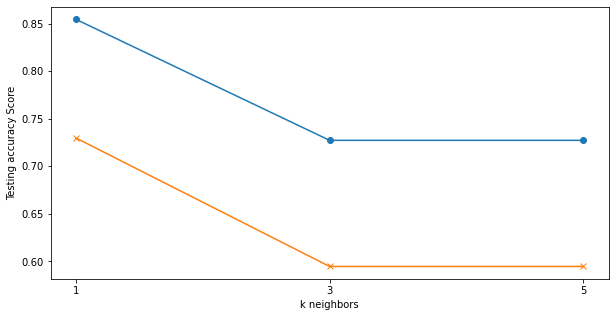

In [71]:
### Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

max_k = 7
k_range = range(1, max_k, 2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.figure(figsize=(10,5))
plt.plot(k_range, train_scores, marker='o')
plt.plot(k_range, test_scores, marker="x")
plt.xticks(k_range)
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [72]:
### Choose the best k from above and re-fit the KNN Classifier using that k value.
knn = KNeighborsClassifier(n_neighbors=max_k)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.730


In [73]:
knn

KNeighborsClassifier(n_neighbors=7)

In [74]:
predictions = knn.predict(X)

In [75]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
predictions.sum()

146

1. build the cluster;
2. begin with small k;

### Create a Logistic Regression Model

In [77]:
### Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

### Fit (train) model using the training data
classifier.fit(X_train_scaled, y_train)

### Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

### Predict the user choice with of the new data point
# new_datapoint_scaladed = X_scaler.transform(user_angela_df[['price','bed', 'bath', 'sqft', 'lot', 'Zip Code']].iloc[4].values.reshape(-1,6))
# predictions = classifier.predict(new_datapoint_scaladed)
# print("Classes are either 0 (dislike) or 1 (like)")
# print(f"The new point was classified as: {predictions}")

### View predictions along with their probabilities of being within each class
predictions = classifier.predict(X_test_scaled)
probs = classifier.predict_proba(X_test_scaled)


prob_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(dislike|0)": [p[0] for p in probs], 
    "P(like|1)": [p[1] for p in probs]})

prob_df

Training Data Score: 0.8545454545454545
Testing Data Score: 0.7297297297297297


,Prediction,Actual,P(dislike|0),P(like|1)
1564,0,0,0.941115,0.058885
1523,0,0,0.941115,0.058885
1539,0,1,0.941115,0.058885
1538,0,0,0.941115,0.058885
1636,0,0,0.941115,0.058885
1541,0,0,0.941115,0.058885
1593,0,0,0.701973,0.298027
1616,0,0,0.941115,0.058885
1584,0,0,0.941115,0.058885
1660,0,0,0.941115,0.058885


In [78]:
### View the rows with incorrect predictions
prob_df[prob_df['Prediction'] != prob_df['Actual']]

,Prediction,Actual,P(dislike|0),P(like|1)
1539,0,1,0.941115,0.058885
1646,0,1,0.941115,0.058885
1668,0,1,0.941115,0.058885
1595,1,0,0.048669,0.951331
1603,1,0,0.257681,0.742319
1586,1,0,0.257681,0.742319
1658,0,1,0.941115,0.058885
1521,0,1,0.941115,0.058885
1631,1,0,0.257681,0.742319
1669,0,1,0.941115,0.058885


<hr style="border: 3px solid red;">

### Machine Learning (Clustering the Houses)

### K-means (based on geolocation, k=7)

In [79]:
data_input = SQL_Query_df[['latitude','longitude']].values

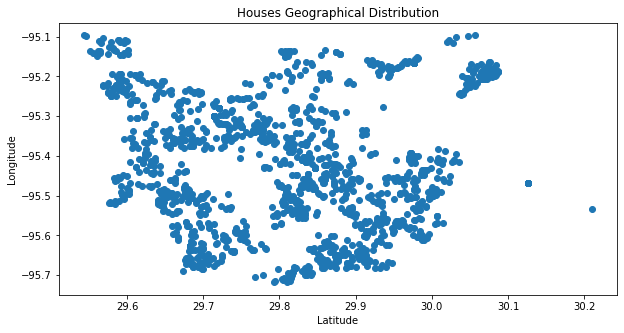

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1])
plt.title('Houses Geographical Distribution')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [81]:
### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

In [82]:
### Fit the model to the data
kmeans.fit(data_input)

KMeans(n_clusters=7)

In [83]:
### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

In [84]:
# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

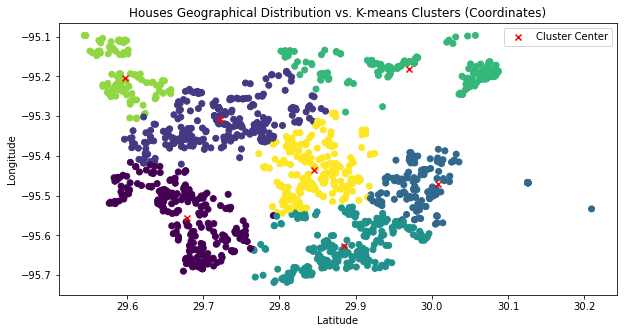

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [86]:
predicted_clusters

array([6, 6, 4, ..., 1, 1, 1], dtype=int32)

### K-means (based on geolocation + Price, k=7)

The results of this attempt show that the clusters contain houses in all regions. <strong>The cluster is pretty much determined by the feature selected, in this case, house price.</strong> This should be a good starting point and then refine the model with more features (iterate).

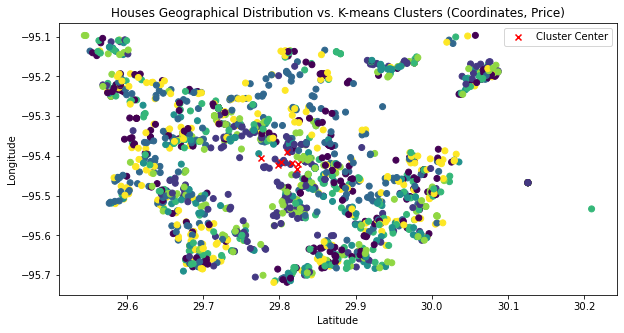

In [87]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price']].values


### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [88]:
# Preview of clusters
predicted_clusters

array([1, 6, 5, ..., 5, 4, 4], dtype=int32)

In [89]:
# Copy original dataframe
clusters_df = SQL_Query_df.copy()

In [90]:
# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

In [91]:
average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    print(f"Cluster {ii} |  ${avg_price}")
    average_price.append(avg_price)

---------------------------------------------
Cluster 1 |  $334911.0
---------------------------------------------
Cluster 6 |  $193632.0
---------------------------------------------
Cluster 5 |  $302491.0
---------------------------------------------
Cluster 2 |  $169110.0
---------------------------------------------
Cluster 3 |  $272276.0
---------------------------------------------
Cluster 0 |  $220285.0
---------------------------------------------
Cluster 4 |  $244455.0


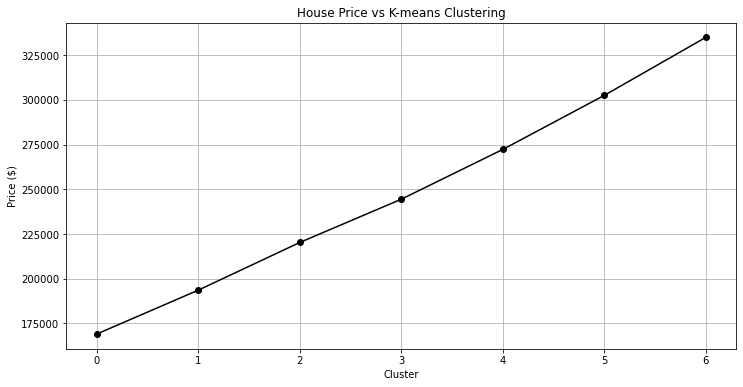

In [92]:
# Plot 
average_price.sort()
fig = plt.figure(figsize=(12, 6))
plt.plot(average_price,marker='o',c='black')
plt.xlabel('Cluster')
plt.ylabel('Price ($)')
plt.title('House Price vs K-means Clustering')
plt.grid()

Text(0.5, 1.0, 'Cluster: #2')

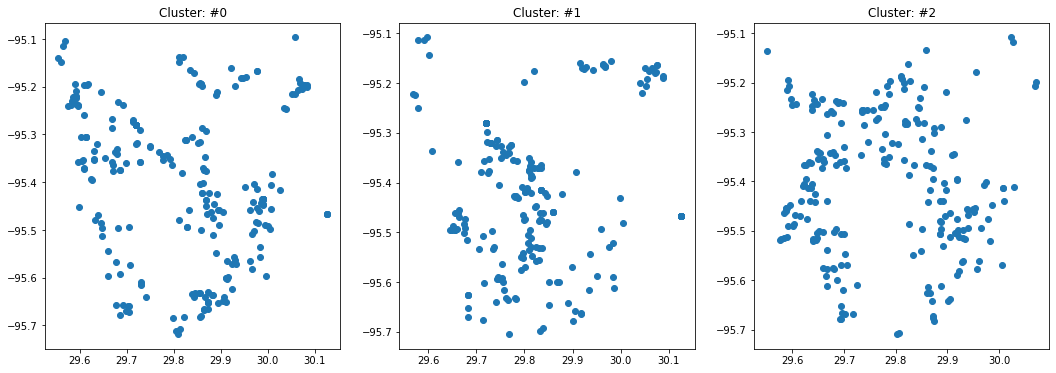

In [93]:
### Plot 3 clustes to see the similarities in geographic region
# Create your subplots
fig1 = plt.figure(figsize=(18, 6))
axes1 = fig1.add_subplot(1, 3, 1)
axes2 = fig1.add_subplot(1, 3, 2)
axes3 = fig1.add_subplot(1, 3, 3)

axes1.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 0],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 0])
axes1.set_title('Cluster: #0')
axes2.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 1],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 1])
axes2.set_title('Cluster: #1')
axes3.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 2],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 2])
axes3.set_title('Cluster: #2')

### K-means (based on geolocation + Price + Beds, k=3)

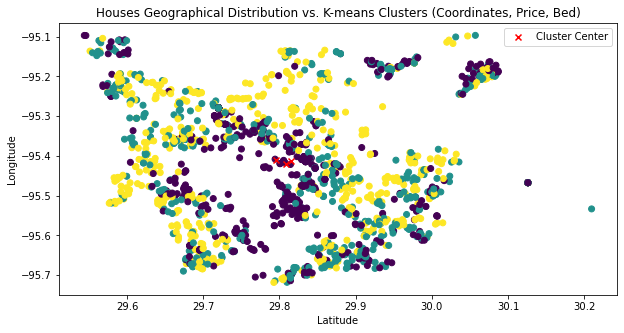

In [94]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price', 'bed']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price, Bed)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [95]:
# Copy original dataframe
clusters_df = SQL_Query_df.copy()

# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

average_price = []
average_bed = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    avg_bed = round(clusters_df[['bed']].loc[clusters_df['Cluster'] == ii].values.mean())
    print(f"Cluster {ii} |  ${avg_price} | {avg_bed} bed")
    average_price.append(avg_price)
    average_bed.append(avg_bed)

---------------------------------------------
Cluster 0 |  $313345.0 | 3.0 bed
---------------------------------------------
Cluster 2 |  $185081.0 | 3.0 bed
---------------------------------------------
Cluster 1 |  $241687.0 | 3.0 bed


<hr style="border: 3px solid red;">

### First Attempt With Clustering

Using price and 3 clusters

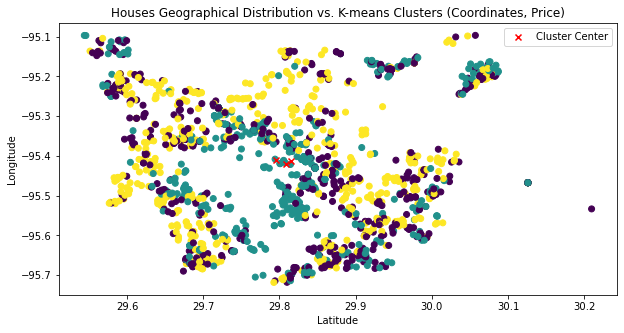

---------------------------------------------
Cluster 1 |  $313345.0
---------------------------------------------
Cluster 2 |  $185081.0
---------------------------------------------
Cluster 0 |  $241687.0


In [96]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# Copy original dataframe
clusters_df = SQL_Query_df.copy()

# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    
    print(f"Cluster {ii} |  ${avg_price}" )
    average_price.append(avg_price)

In [97]:
# Example of cluster 0
print(f"{clusters_df.loc[clusters_df['Cluster']==0].iloc[0]}")

house_id                                                      818
address                     15003 Pearhaven Dr, Houston, TX 77062
price                                               275000.000000
bed                                                      4.000000
bath                                                     2.500000
sqft                                                  2548.000000
lot                                                   9090.000000
latitude                                                29.581364
longitude                                              -95.128447
house_link      https://www.realtor.com/realestateandhomes-det...
image_1         https://ap.rdcpix.com/d9b38955da2e0e385a024320...
image_2         https://ap.rdcpix.com/d9b38955da2e0e385a024320...
map_link        https://www.openstreetmap.org/?mlat=29.5813636...
google_map      https://www.google.com/maps/place/15003+Pearha...
created_date                           2021-01-11 20:28:57.573093
Zip Code  

In [98]:
# Example of cluster 2
print(f"{clusters_df.loc[clusters_df['Cluster']==2].iloc[0]}")

house_id                                                      174
address                       7911 Napawood Ct, Houston, TX 77088
price                                               199900.000000
bed                                                      4.000000
bath                                                     2.500000
sqft                                                  1920.000000
lot                                                   6491.000000
latitude                                                29.880633
longitude                                              -95.484069
house_link      https://www.realtor.com/realestateandhomes-det...
image_1         https://ap.rdcpix.com/434ef360d1242e7680dbcf64...
image_2         https://ap.rdcpix.com/434ef360d1242e7680dbcf64...
map_link        https://www.openstreetmap.org/?mlat=29.8806332...
google_map      https://www.google.com/maps/place/7911+Napawoo...
created_date                           2021-01-10 21:13:15.139330
Zip Code  

In [99]:
clusters_2nd_pick_df = clusters_df.loc[clusters_df['Cluster']==0]

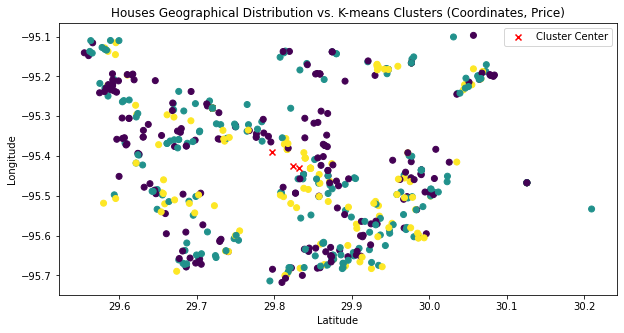

---------------------------------------------
Cluster 0 |  $241687.0


In [100]:
# Select which columns will be used to create the clusters
data_input = clusters_2nd_pick_df[['latitude','longitude','price']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# Copy original dataframe
clusters_df = clusters_2nd_pick_df.copy()

# Add column with the cluster
clusters_df['Cluster 2nd'] = pd.Series(predicted_clusters)

average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    
    print(f"Cluster {ii} |  ${avg_price}" )
    average_price.append(avg_price)

<hr style="border: 3px solid red;">

# Saving ML Model

In [131]:
import pickle

with open(os.path.join('Models','kmeans1.pkl'),'wb') as f:
    pickle.dump(kmeans, f)

In [132]:
# Loading the saved model

with open(os.path.join('Models','kmeans1.pkl'), 'rb') as f:
    model = pickle.load(f)

In [135]:
# Test the saved model
predicted_clusters = model.predict(data_input)

In [136]:
predicted_clusters

array([2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2,
       2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1,

In [137]:
# Testing with a single input
houseinfo = SQL_Query_df.loc[SQL_Query_df['house_id']==173]
houseinfo[['latitude','longitude','price']].values
print(f"This houses is from cluster = {model.predict(houseinfo[['latitude','longitude','price']].values)[0]}")

This houses is from cluster = 2


In [138]:
# Testing with a single input
houseinfo = SQL_Query_df.loc[SQL_Query_df['house_id']==573]
houseinfo[['latitude','longitude','price']].values
print(f"This houses is from cluster = {model.predict(houseinfo[['latitude','longitude','price']].values)[0]}")

This houses is from cluster = 0
